In [519]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('dark_background')
plt.style.use('seaborn-darkgrid')

import control.matlab as matlab

C:\Users\felip\AppData\Local\Temp\ipykernel_20708\3263489444.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


dados de simulacao

\dot{x}(t) = -2x(t)+bu(t)

x = (b/(s+2))u

In [520]:
# Definição das funções de transferência do sistema
s = matlab.tf('s')
a = 2
b = 8

ftx = b / (s + a)
ftx1 = (b * s) / ((s + a) * (s**2 + 2*s + 1))
ftx2 = b / ((s + a) * (s**2 + 2*s + 1))
ftx3 = 1 / (s**2 + 2*s + 1)

ftx

TransferFunction(array([8]), array([1, 2]))

In [521]:
# Parâmetros de simulação
N = 1000
dt = 0.001  # Taxa de amostragem
T = np.arange(0, N + dt, dt)
u = np.cos(2 * T)  # Entrada senoidal

len(T)

1000001

C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\control\timeresp.py:940: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


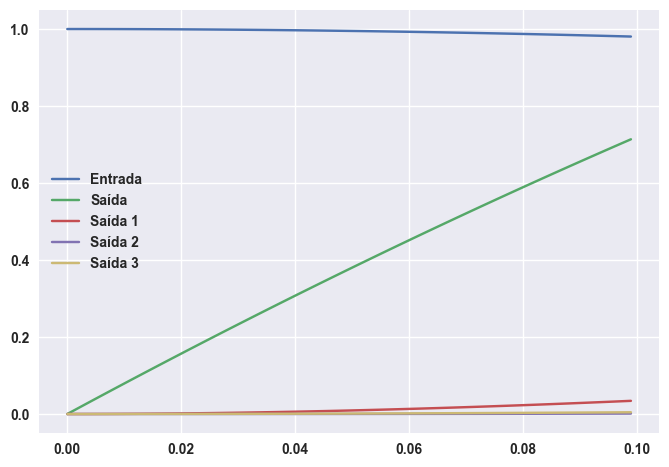

In [522]:
# Simulação dos modelos
Y, T, _ = matlab.lsim(ftx, u, T)
Y1, T, _ = matlab.lsim(ftx1, u, T)
Y2, T, _ = matlab.lsim(ftx2, u, T)
Y3, T, _ = matlab.lsim(ftx3, u, T)

# Plotagem dos resultados juntos
plt.plot(T[:100], u[:100], label='Entrada')
plt.plot(T[:100], Y[:100], label='Saída')
plt.plot(T[:100], Y1[:100], label='Saída 1')
plt.plot(T[:100], Y2[:100], label='Saída 2')
plt.plot(T[:100], Y3[:100], label='Saída 3')
plt.legend()
plt.show()

In [523]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%
# Inicialização de variáveis
theta = np.zeros((2, int(N/dt) + 1))  # Matriz para armazenar os parâmetros estimados
theta[:, 0] = [0, 0]
erro = np.zeros(int(N/dt) + 1)  # Vetor de erros
gama = np.array([[1000, 0], [0, 1000]])  # Matriz de ajuste
alpha = 0.5  # Fator de ajuste

In [524]:
# Loop de iterações para o algoritmo adaptativo

for k in range(0, int(N/dt)):
    y = Y[k]
    
    # Construção do vetor phi
    phi = np.array([[Y2[k]], [Y3[k]]])
    
    # Cálculo de ms (fator de ajuste)
    ms = 1 + alpha * np.dot(phi.T, phi)[0, 0]
    
    # Atualização dos parâmetros estimados usando o algoritmo adaptativo
    delta_theta = (dt * np.dot(gama, (Y1[k] - np.dot(theta[:, k].T, phi)) * phi) / ms**2).reshape((2,))

    theta[:, k+1] = theta[:, k] + delta_theta
    erro[k+1] = (Y1[k] - np.dot(theta[:, k].T, phi))[0] / ms**2

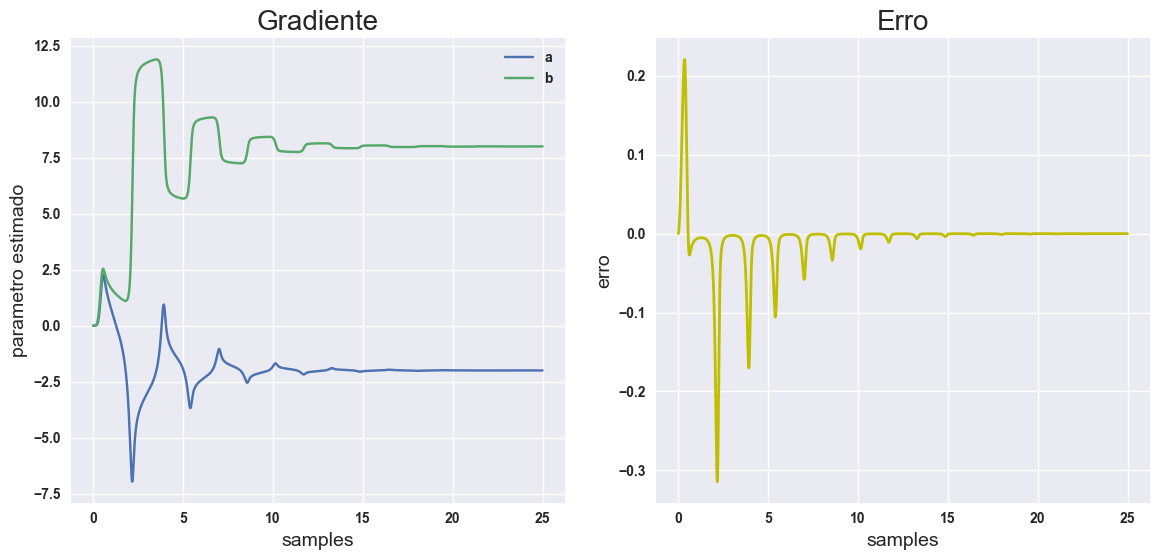

In [526]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%
# Gráfico dos parâmetros identificados e do erro

# Crie uma figura com 1 linha e 2 colunas para os subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

corte = 25000

fontesize = 14
titlesize = 20
# Primeiro subplot (Gráfico dos parâmetros estimados)
axs[0].plot(T[:corte], theta[0, :][:corte], label='a')
axs[0].plot(T[:corte], theta[1, :][:corte], label='b')
axs[0].legend()
axs[0].set_xlabel('samples', fontsize=fontesize)
axs[0].set_ylabel('parametro estimado', fontsize=fontesize)
axs[0].set_title('Gradiente', fontsize=titlesize)

# Segundo subplot (Gráfico do erro)
axs[1].plot(T[:corte], erro[:corte], 'y', linewidth=2)
axs[1].set_xlabel('samples', fontsize=fontesize)
axs[1].set_ylabel('erro', fontsize=fontesize)
axs[1].set_title('Erro', fontsize=titlesize)
axs[1].grid(True)


# Ajuste o espaço entre os subplots
plt.tight_layout()

# Exiba os subplots lado a lado
plt.show()